## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Reading the CSV file and storing as a dataframe
df_clustering = pd.read_csv('clustering.csv')
print(df_clustering.head())
print(df_clustering.shape)

#Splitting the class and feature matrix
Class = df_clustering.iloc[:,-1].values
features = df_clustering.iloc[:,:7].values
print(Class.shape)
print(features.shape)

   height  length   width    std    min    max  kurtosis  Class
0   15.26   14.84  0.8710  5.763  3.312  2.221     5.220      0
1   14.88   14.57  0.8811  5.554  3.333  1.018     4.956      0
2   14.29   14.09  0.9050  5.291  3.337  2.699     4.825      0
3   13.84   13.94  0.8955  5.324  3.379  2.259     4.805      0
4   16.14   14.99  0.9034  5.658  3.562  1.355     5.175      0
(210, 8)
(210,)
(210, 7)


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

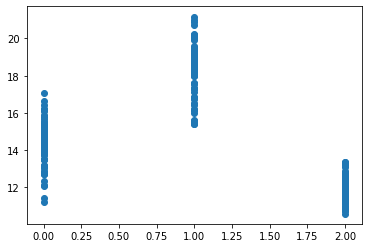

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
The optimum number of clusters for the given dataset is 3 from the elbow plot


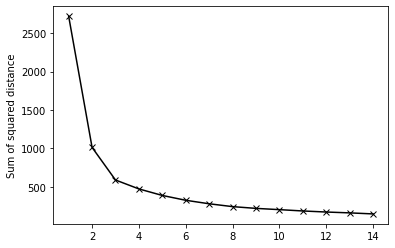

In [197]:
#https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans
#Plotting a scatter diagram to identify the number of clusters in features
plt.scatter(Class, features[:,0])
plt.show()
#There are 3 clusters identified with features

print(Class)
#Class has 3 clusters (0,1,2)


#Elbow plot is another methode in determining the number of clusters 
totSqrdDist=[]

kRange=range(1,15)

for k in kRange:
    kmns=KMeans(n_clusters=k)
    kmns=kmns.fit(features)
    totSqrdDist.append(kmns.inertia_)

    
plt.plot(kRange,totSqrdDist,'-xk')
plt.ylabel('Sum of squared distance')

print('The optimum number of clusters for the given dataset is 3 from the elbow plot')

#the number of clusters in the dataset is as same as the number of classes


3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [198]:
'''
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
  
'''
from sklearn import metrics


km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y = km.fit(features)

#Calculated clusters for the features
y_km = km.fit_predict(features)


#Print the cluster centers
print(km.cluster_centers_) 
print(km.labels_)


#Computing the purity based on the predicted labels and the actual labels in Class
def purity_score_(Class, y_km):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(Class, y_km)
    #print(contingency_matrix)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print('The purity score(%) of clustering is : ', round(purity_score_(Class, y_km)*100,2))



[[14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
The purity score(%) of clustering is :  89.52


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [218]:
'''
https://github.com/annoviko/pyclustering/issues/471 
https://pyclustering.github.io/docs/0.8.2/html/da/d22/classpyclustering_1_1cluster_1_1kmeans_1_1kmeans.html

'''

!pip install pyclustering

from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric, type_metric

 
                                                                                 
# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(features, 3).initialize()

#Kmean clustering with EUCLIDEAN metric
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)
#Initialise the model
kmeans_ = kmeans(features, initial_centers, metric=euclidean_metric)
#Run the cluster analysis and get the clusters
kmeans_euclidean_ = kmeans_.process()
kmeans_euclidean_vals = kmeans_euclidean_.predict(features)

print('The purity score(%) of clustering with euclidean distance metric is: ', round(purity_score_(Class, kmeans_euclidean_vals)*100,2))



#Implement kmean clustering with Manhattan distance metric
Manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance_manhattan = kmeans(features, initial_centers, metric=Manhattan_metric)
#Run the cluster analysis and obtain the results
kmeans_instance_manhattan = kmeans_instance_manhattan.process()
cluster_manhattan = kmeans_instance_manhattan.predict(features)

print("The % purity score using Manhattan distance metric is: ", round(purity_score_(Class,cluster_manhattan) *100,2))



#kmean clustering with Minkowski distance metric
minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree = 4)
kmeans_instance_minkowski = kmeans(features, initial_centers, metric=minkowski_metric)
#Run the cluster analysis and obtain the results
kmeans_instance_minkowski = kmeans_instance_minkowski.process()
cluster_minkowski = kmeans_instance_minkowski.predict(features)

print("The % purity score using Minkowski distance metric is: ", round(purity_score_(Class,cluster_minkowski)*100,2))



#kmean clustering with squared euclidean distance metric
euclidean_sq_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
kmeans_instance_eucli_sq = kmeans(features, initial_centers, metric=euclidean_sq_metric)
#Run the cluster analysis and obtain the results
kmeans_instance_eucli_sq = kmeans_instance_eucli_sq.process()
cluster_sq_euclidean = kmeans_instance_eucli_sq.predict(features)

print("The %purity score using squared euclidean distance metric is: ", round(purity_score_(Class,cluster_sq_euclidean) *100,2))


#kmean clustering with Chebyshev distance metric
chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)

kmeans_instance_chebyshev = kmeans(features, initial_centers, metric=chebyshev_metric)

#Run the cluster analysis and obtain the results
kmeans_instance_chebyshev = kmeans_instance_chebyshev.process()

cluster_chebyshev = kmeans_instance_chebyshev.predict(features)

print("The %purity score using Chebyshev distance metric is: ", round(purity_score_(Class,cluster_chebyshev)*100,2))

print('Based on the results comparison, the distance metric which gives the highest purity of clusters can be chosen as the best,therefore,euclidean metric which gives 90.48% purity score can be considered as the best distant metric to determine the purity') 


The purity score(%) of clustering with euclidean distance metric is:  90.48
The % purity score using Manhattan distance metric is:  89.05
The % purity score using Minkowski distance metric is:  90.48
The %purity score using squared euclidean distance metric is:  89.52
The %purity score using Chebyshev distance metric is:  87.62
Based on the results comparison, the distance metric which gives the highest purity of clusters can be chosen as the best,therefore,euclidean metric which gives 90.48% purity score can be considered as the best distant metric to determine the purity


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [226]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest
 #https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/
 #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html


#Chi square to select the best 3 features
chi2_selector = SelectKBest(chi2, k=3)
X_kbest = chi2_selector.fit_transform(features, Class)
X_kbest = pd.DataFrame(X_kbest, columns= ['height', 'length', 'max'])
print('Reduced number of features:', X_kbest.shape[1])
print(X_kbest)

#Fit to the kmeans algorithm
y_chi2 = km.fit(X_kbest)

#Calculated clusters for the features
y_chi2_km = km.fit_predict(X_kbest)


print('The purity score(%) of clustering using Chi square is  : ', round(purity_score_(Class, y_chi2_km)*100,2))

#ANOVA to select the best 3 features
ANOVA_selector = SelectKBest(f_classif, k=3)
f_kbest = ANOVA_selector.fit_transform(features, Class)
f_kbest = pd.DataFrame(f_kbest,columns= ['height', 'length', 'min'])
print('Reduced number of features using ANOVA is :', f_kbest.shape[1])
print(f_kbest)
#Fit to the kmeans algorithm
y_ANOVA = km.fit(f_kbest)

#Calculated clusters for the features
y_ANOVA_km = km.fit_predict(f_kbest)

print('The purity score(%) of clustering using ANOVA methos is  : ', round(purity_score_(Class, y_ANOVA_km)*100,2))


print('Based on the purity scores, Chi square method accounts for the highest purity.Therefore the three features that are selected are height, length and min')

Reduced number of features: 3
     height  length    max
0     15.26   14.84  2.221
1     14.88   14.57  1.018
2     14.29   14.09  2.699
3     13.84   13.94  2.259
4     16.14   14.99  1.355
..      ...     ...    ...
205   12.19   13.20  3.631
206   11.23   12.88  4.325
207   13.20   13.66  8.315
208   11.84   13.21  3.598
209   12.30   13.34  5.637

[210 rows x 3 columns]
The purity score(%) of clustering using Chi square is  :  89.52
Reduced number of features using ANOVA is : 3
     height  length    min
0     15.26   14.84  3.312
1     14.88   14.57  3.333
2     14.29   14.09  3.337
3     13.84   13.94  3.379
4     16.14   14.99  3.562
..      ...     ...    ...
205   12.19   13.20  2.981
206   11.23   12.88  2.795
207   13.20   13.66  3.232
208   11.84   13.21  2.836
209   12.30   13.34  2.974

[210 rows x 3 columns]
The purity score(%) of clustering using ANOVA methos is  :  84.29
Based on the purity scores, Chi square method accounts for the highest purity.Therefore the three 

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

[7.187e+01 1.711e+01 9.690e+00 9.800e-01 2.700e-01 8.000e-02 1.000e-02]
[ 71.87  88.98  98.67  99.65  99.92 100.   100.01]


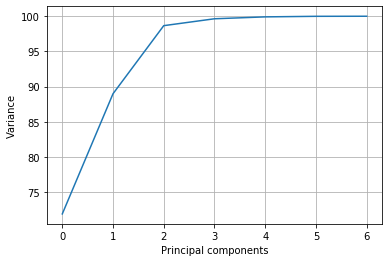

minimum dimension that can capture 89 percent variance is : 3
minimum dimension that can capture 99 percent variance is : 4


In [228]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#normalise the data 
df_norm = scale(features)

pca = PCA(n_components = 7)

df_pca = pca.fit(df_norm)


#The amount of variance in each pc
var = df_pca.explained_variance_ratio_
print(np.round(var*100,2))

#cumulative variance explains
var1 = np.cumsum(np.round(df_pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

#Plot showing the captured variance with respect to increasing latent dimensionality
plt.plot(var1)
plt.xlabel('Principal components')
plt.ylabel('Variance')
plt.grid()
plt.show()



pca_var89 = PCA(n_components= 0.89)
pca_89 = pca_var89.fit_transform(df_norm)
print("minimum dimension that can capture 89 percent variance is :" , pca_89.shape[1])

pca_var99 = PCA(n_components= 0.99)
pca_99 = pca_var99.fit_transform(df_norm)
print("minimum dimension that can capture 99 percent variance is :",pca_99.shape[1])



1. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. (7 marks)

Purity score of clusters formed by 89% var is:  0.9095238095238095
--------------------------------------------------
[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]
Purity score of clusters formed by 99% var is:  0.919047619047619


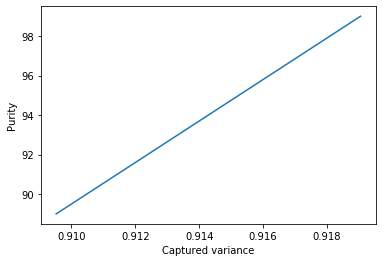

from the graph we can determine the purity score is high with the captured variance, so that we can see at 99% variance the purity is highest at 91.9% and therefore we can use the highest variance of 99% for the hghest purity scores


In [241]:
##https://sbrouil.github.io/ml-sandbox/MNIST+Kaggle+Digit+clusterization+using+KMeans.html


#At 89%
kmeans_89 = KMeans(n_clusters = 3).fit(pca_89)
labels_89  = kmeans_89.labels_

print("Purity score of clusters formed by 89% var is: ",purity_score_(Class,labels_89))

purity_89 = purity_score_(Class,labels_89)


print('-'*50)



#At 99%
kmeans_99 = KMeans(n_clusters = 3).fit(pca_99)
labels_99  = kmeans_99.labels_

print(labels_99)
print("Purity score of clusters formed by 99% var is: ",purity_score_(Class,labels_99))

purity_99 = purity_score_(Class,labels_99)

y = [89, 99]
X = [purity_89, purity_99]

plt.plot(X, y)
plt.xlabel("Captured variance")
plt.ylabel("Purity")
plt.show()

print('from the graph we can determine the purity score is high with the captured variance, so that we can see at 99% variance the purity is highest at 91.9% and therefore we can use the highest variance of 99% for the hghest purity scores')




3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

In [237]:
#https://www.researchgate.net/post/What_happens_if_PCA_Principal_Component_Analysis_is_applied_on_nonlinear_data
#https://medium.com/@ODSC/implementing-a-kernel-principal-component-analysis-in-python-495f04a7f85f
'''
PCA works optimally only in the situation where the correlations are linear, 
which is most of the time an approximation. According to a review on Dimensionality reduction, 
Traditionally, dimensionality reduction was performed using linear techniques such as 
Principal Components Analysis (PCA) and factor analysis. However, these linear techniques on dimensionality reduction
cannot adequately handle complex nonlinear data, but the non linear techniques to handle non linear data which were developed later. 

kernal pca function can be used on non linear data. (rbf_kernel_pca(X, gamma=15, n_components=2) or by using sklearn library)
Therefore pca can be used on linear and non linear data. 
 

'''

'\nPCA works optimally only in the situation where the correlations are linear, \nwhich is most of the time an approximation. According to a review on Dimensionality reduction, \nTraditionally, dimensionality reduction was performed using linear techniques such as \nPrincipal Components Analysis (PCA) and factor analysis. However, these linear techniques on dimensionality reduction\ncannot adequately handle complex nonlinear data, but the non linear techniques to handle non linear data which were developed later. \n\nkernal pca function can be used on non linear data. (rbf_kernel_pca(X, gamma=15, n_components=2) or by using sklearn library)\nTherefore pca can be used on linear and non linear data. \n \n\n'